# **SMS**

### Import The Required Libraries

In [ ]:
# This Library helps to convert different data files into Pandas Data frames.
import pandas as pd

# This library helps us to perform numerical operations on different Data Structures.
import numpy as np

#This both libraries are used to perform visualization in Python Environment
import matplotlib.pyplot as plt
import seaborn as sns

### Load the Dataset

In [ ]:
# Read the dataset from the Local
df_SMS = pd.read_csv('message_dataset_50k.csv')

# **DATA OVERVIEW**

### Information about the Data Source

### Information about the Columns

In [ ]:
df_SMS.columns

Index(['Message', 'Category'], dtype='object')

### Column Description

1. **Message**

   * Type: **Text (String)**
   * Description: The actual **SMS / A2P message** sent.
   * Example:

     * "Win a FREE trip to Goa! Click here: xyz.com"
     * "Meeting at 4 pm in the office."
   * Purpose: This is the **input feature** (what we’ll analyze to detect spam/ham).



2. **Category**

   * Type: **Categorical (Label)**
   * Description: The class assigned to the message. Usually **two categories**:

     * "spam" → Message is unwanted/promotional/fraud.
     * "ham" → Message is normal/legitimate.
   * Example:

     * "spam" → "Get 50% OFF on loans today!!"`
     * "ham" → "Don’t forget your doctor appointment tomorrow."`
   * Purpose: This is the **target variable** (what we’ll predict using ML).



### Shape of Data

In [ ]:
# Shape of data
df_SMS.shape

(50000, 2)

### Interpretation

* We have 50000 observations and 2 attributes.

## Check the Data Type and Data size

In [ ]:
# Check the info
df_SMS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Message   50000 non-null  object
 1   Category  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


### Interpretation

We have 2 Categorical Columns.
There are no NULL records present.

The Data Size 781.4+ KB

# **BASIC STATISTICS OF DATA**

In [ ]:
# Describe the data
df_SMS.describe(include='all').T

,count,unique,top,freq
Message,50000,4220,You have successfully logged into your account.,1015
Category,50000,3,Promotional,19888


# Interpretation

### **Message Column**

1. **Total Records** → Contains **50,000 text messages**.
2. **Unique Values** → Only **4,220 unique messages**, meaning the dataset has a lot of **repeated messages**.
3. **Most Frequent Message** → *"You have successfully logged into your account."*
4. **Frequency of Top Message** → This message appears **1,015 times**, showing it’s a common system-generated message.
5. **Nature** → Represents the **actual text content** that will be analyzed for spam/ham classification.



### **Category Column**

1. **Total Records** → Contains **50,000 labels** (one for each message).
2. **Unique Values** → There are **3 unique categories** (e.g., Promotional, Transactional, Spam / Ham).
3. **Most Frequent Category** → *Promotional*.
4. **Frequency of Top Category** → Promotional appears **19,888 times**, making it the **dominant class** in the dataset.
5. **Nature** → Acts as the **target variable (label)** for classification – the model will predict this.


## NULL VALUE HANDLING

In [ ]:
# Check the count of missing records
df_SMS.isnull().sum()

,0
Message,0
Category,0


Interpretation

* We dont have null values.

In [ ]:
df_SMS.head()

,Message,Category
0,Final notice. Update your info: https://verify...,Spam
1,Reset your password now at https://get-rich-fa...,Spam
2,Your transaction ID is TXN471861. Please keep ...,Transactional
3,Your package with tracking ID 162556 has been ...,Transactional
4,Earn money fast! Start today: https://login-no...,Spam


### Remove Duplicate

In [ ]:
# Count duplicates in the "message" column
duplicate_count = df_SMS["Message"].duplicated().sum()
print("Number of duplicate messages:", duplicate_count)

# Show duplicate rows (if any)
duplicates = df_SMS[df_SMS["Message"].duplicated(keep=False)]
print("\nDuplicate messages with URLs included:")
print(duplicates[["Message"]])

Number of duplicate messages: 45780

Duplicate messages with URLs included:
                                                 Message
0      Final notice. Update your info: https://verify...
1      Reset your password now at https://get-rich-fa...
4      Earn money fast! Start today: https://login-no...
7      Check out our latest deals at https://merchant...
8      Upgrade your plan today: https://merchant-site...
...                                                  ...
49995  Track your shipment here: https://www.airtel.i...
49996  Exclusive deals available here: https://www.my...
49997    You have successfully logged into your account.
49998  Introducing our new range. Learn more: https:/...
49999  Upgrade your plan today: https://secure.bankpo...

[46080 rows x 1 columns]


In [ ]:
import pandas as pd
import re

# Load dataset
file_path = "message_dataset_50k.csv"
df_SMS = pd.read_csv(file_path)

# Step 1: Remove duplicates
df_SMS = df_SMS.drop_duplicates(subset=["Message"])

# Step 2: Cleaning function
def clean_message(text):
    text = str(text).lower()                         # normalize casing
    text = re.sub(r"http\S+", " url ", text)         # replace URLs with token
    text = re.sub(r"[^a-z0-9\s]", " ", text)         # remove special chars
    text = re.sub(r"\s+", " ", text).strip()         # normalize spaces
    return text

# Step 3: Apply cleaning
df_SMS["cleaned_message"] = df_SMS["Message"].apply(clean_message)

# Step 4: Save cleaned dataset
df_SMS.to_csv("cleaned_sms.csv", index=False)

print("Cleaning complete. Saved to cleaned_sms.csv")
print("Total rows after cleaning:", len(df_SMS))

Cleaning complete. Saved to cleaned_sms.csv
Total rows after cleaning: 4220


## Interpretation

* The dataset originally had 50,000 rows, but after removing duplicates, only 4,220 unique messages remained. This shows that about 91% of the data was repeated, making the original dataset misleadingly large. The cleaned dataset, though smaller, is now more reliable, diverse, and suitable for fair model training and evaluation.

## Manual Labeling

In [ ]:
import pandas as pd
import re

# Load dataset (assume no labels)
file_path = "message_dataset_50k.csv"
df_SMS = pd.read_csv(file_path)

# Function to classify messages
def classify_message(text):
    text = str(text).lower()

    # Rule 1: Transactional (OTPs, confirmations, alerts)
    if any(word in text for word in ["otp", "password", "transaction", "debited", "credited",
                                     "payment", "successful", "alert", "update", "booking", "order"]):
        return "Transactional"

    # Rule 2: Promotional (offers, sales, marketing)
    elif any(word in text for word in ["offer", "discount", "sale", "deal", "save", "buy",
                                       "win", "free", "cashback", "shopping", "hurry", "limited"]):
        return "Promotional"

    # Rule 3: Spam (phishing links, scam patterns, suspicious domains)
    elif re.search(r"(bit\.ly|tinyurl|win money|lottery|click here|urgent)", text):
        return "Spam"

    # Fallback: Needs manual review
    else:
        return "Manual_Review"

# Apply classification
df_SMS["Auto_Label"] = df_SMS["Message"].apply(classify_message)

# Save for manual review
df_SMS.to_csv("labeled_sms.csv", index=False)

print("Auto-labeling complete. Saved to labeled_sms.csv")
print(df_SMS["Auto_Label"].value_counts())

Auto-labeling complete. Saved to labeled_sms.csv
Auto_Label
Manual_Review    17543
Transactional    16590
Promotional      14912
Spam               955
Name: count, dtype: int64


## Data Labelling

In [ ]:
# Apply cleaning
df_SMS["cleaned_message"] = df_SMS["Message"].apply(clean_message)

# Apply classification
df_SMS["category"] = df_SMS["cleaned_message"].apply(classify_message)

# Keep only required columns
final_df = df_SMS[["Message", "category", "cleaned_message"]]
final_df.rename(columns={"Message": "message"}, inplace=True)

# Save to CSV
final_df.to_csv("final_labeled_dataset.csv", index=False, encoding="utf-8")

print("Final dataset created: final_labeled_dataset.csv")
print(final_df.head())

/tmp/ipython-input-3254859315.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.rename(columns={"Message": "message"}, inplace=True)


Final dataset created: final_labeled_dataset.csv
                                             message       category  \
0  Final notice. Update your info: https://verify...  Transactional   
1  Reset your password now at https://get-rich-fa...  Transactional   
2  Your transaction ID is TXN471861. Please keep ...  Transactional   
3  Your package with tracking ID 162556 has been ...  Manual_Review   
4  Earn money fast! Start today: https://login-no...  Manual_Review   

                                     cleaned_message  
0                  final notice update your info url  
1                     reset your password now at url  
2  your transaction id is txn471861 please keep i...  
3  your package with tracking id 162556 has been ...  
4                    earn money fast start today url  


In [ ]:
import pandas as pd
import re

# Load dataset (replace with your actual path)
df = pd.read_csv("message_dataset_50k.csv")

# Step 1: Remove duplicates
df = df.drop_duplicates(subset=['Message']).reset_index(drop=True)

# Step 2: Clean text
def clean_text(text):
    text = str(text).lower()                          # lowercase
    text = re.sub(r'[^a-z0-9\s]', ' ', text)          # remove special characters
    text = re.sub(r'\s+', ' ', text).strip()          # remove extra spaces
    return text

df['cleaned_message'] = df['Message'].apply(clean_text)

# Step 3: Label messages (this will need manual/semi-automated rules)
def label_message(msg):
    if re.search(r'otp|one time password|transaction|debited|credited|alert', msg):
        return "Transactional"
    elif re.search(r'offer|sale|discount|deal|free|buy now', msg):
        return "Promotional"
    else:
        return "Spam"

df['category'] = df['cleaned_message'].apply(label_message)

# Reorder columns
df = df[['Message', 'category', 'cleaned_message']]

# Save final dataset
df.to_csv("labeled_sms_dataset.csv", index=False)

print("Preprocessing & labeling completed. Saved as labeled_sms_dataset.csv")

Preprocessing & labeling completed. Saved as labeled_sms_dataset.csv


# Spam Classifier

In [33]:
# Step 2: Load dataset. If file has no 'category', apply a simple rule-based bootstrap labeling.
df = pd.read_csv(DATA_PATH)
print("Loaded rows:", len(df))
print("Columns:", df.columns.tolist())

# If dataset isn't labeled, auto-label with a basic rule-based function (then save)
if 'category' not in df.columns:
    print("No 'category' column found — applying heuristic auto-labeling (please review!).")
    def auto_label(msg):
        m = str(msg).lower()
        if re.search(r'\botp\b|\bone time password\b|\bcredited\b|\bdebited\b|\balert\b|\btransaction\b', m):
            return "Transactional"
        if re.search(r'\boffer\b|\bsale\b|\bdiscount\b|\boff\b|\bfree\b|\bbuy now\b', m):
            return "Promotional"
        return "Spam"
    df['category'] = df['message'].apply(auto_label)
    df.to_csv("labeled_sms_dataset_auto.csv", index=False)
    print("Saved bootstrap-labeled dataset to labeled_sms_dataset_auto.csv")
else:
    print("'category' column present - OK.")


Loaded rows: 4220
Columns: ['Message', 'category', 'cleaned_message']
'category' column present - OK.


In [35]:
# Step 3: Cleaning function and apply
def clean_text(txt):
    txt = str(txt).lower()
    # remove urls
    txt = re.sub(r'http\S+|www\.\S+', ' ', txt)
    # remove all non-alphanumeric characters (keep spaces)
    txt = re.sub(r'[^a-z0-9\s]', ' ', txt)
    # collapse whitespace
    txt = re.sub(r'\s+', ' ', txt).strip()
    return txt

# create/overwrite cleaned_message
df['cleaned_message'] = df.get('cleaned_message', df['Message']).astype(str).apply(clean_text)

# quick sanity print
print("Example original -> cleaned:")
for i in range(min(3, len(df))):
    print(df['Message'].iloc[i], "->", df['cleaned_message'].iloc[i])

Example original -> cleaned:
Final notice. Update your info: https://verify-now.online -> final notice update your info verify now online
Reset your password now at https://get-rich-fast.biz -> reset your password now at get rich fast biz
Your transaction ID is TXN471861. Please keep it for your records. -> your transaction id is txn471861 please keep it for your records


In [36]:
# Step 4: Train-test split (stratified)
X = df['cleaned_message']
y = df['category']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, stratify=y, random_state=RANDOM_STATE
)

print("Train counts:\n", y_train.value_counts())
print("Test counts:\n", y_test.value_counts())


Train counts:
 category
Spam             1719
Transactional    1592
Promotional        65
Name: count, dtype: int64
Test counts:
 category
Spam             430
Transactional    398
Promotional       16
Name: count, dtype: int64


In [37]:
# Step 5: Optional upsampling to improve minority-class recall (e.g., Promotional)
if UPSAMPLE_SMALL_CLASSES:
    train_df = pd.DataFrame({'text': X_train, 'category': y_train}).reset_index(drop=True)
    min_count = train_df['category'].value_counts().min()
    target = min_count * UPSAMPLE_MULT

    frames = []
    for cls, grp in train_df.groupby('category'):
        if len(grp) < target:
            up = resample(grp, replace=True, n_samples=target, random_state=RANDOM_STATE)
            frames.append(up)
        else:
            frames.append(grp)
    balanced = pd.concat(frames).sample(frac=1, random_state=RANDOM_STATE).reset_index(drop=True)
    X_train = balanced['text']
    y_train = balanced['category']
    print("After upsampling, train class counts:\n", y_train.value_counts())
else:
    print("Skipping upsampling.")

After upsampling, train class counts:
 category
Spam             1719
Transactional    1592
Promotional       195
Name: count, dtype: int64


In [38]:
# Step 6: Build pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=TFIDF_MAX_FEATURES, ngram_range=NGRAM_RANGE)),
    ('clf', LogisticRegression(solver='liblinear', max_iter=1000, random_state=RANDOM_STATE))
])
# Option: pipeline.set_params(clf__class_weight='balanced')  # alternative to upsampling


In [39]:
# Step 7: Train
t0 = time.perf_counter()
pipeline.fit(X_train, y_train)
train_time = time.perf_counter() - t0
print(f"Training done in {train_time:.3f} sec")


Training done in 0.110 sec


In [44]:
# Train model on ALL data (no test split)
# --------------------
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_tfidf = tfidf.fit_transform(X)

model = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42)
model.fit(X_tfidf, y)

# --------------------
# Evaluate on training data itself
# --------------------
y_pred_train = model.predict(X_tfidf)

accuracy = accuracy_score(y, y_pred_train)
precision, recall, f1, _ = precision_recall_fscore_support(y, y_pred_train, average='weighted')

print("=== Train Set Performance ===")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print("\nClassification Report:\n", classification_report(y, y_pred_train))

=== Train Set Performance ===
Accuracy:  0.9957
Precision: 0.9958
Recall:    0.9957
F1 Score:  0.9955

Classification Report:
                precision    recall  f1-score   support

  Promotional       1.00      0.78      0.88        81
         Spam       0.99      1.00      1.00      2149
Transactional       1.00      1.00      1.00      1990

     accuracy                           1.00      4220
    macro avg       1.00      0.93      0.96      4220
 weighted avg       1.00      1.00      1.00      4220



In [40]:
# Step 8: Predict & metrics
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print("=== Test metrics ===")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 (wtd):  {f1:.4f}\n")
print("Classification report:\n", classification_report(y_test, y_pred))


=== Test metrics ===
Accuracy:  0.9988
Precision: 0.9988
Recall:    0.9988
F1 (wtd):  0.9988

Classification report:
                precision    recall  f1-score   support

  Promotional       1.00      0.94      0.97        16
         Spam       1.00      1.00      1.00       430
Transactional       1.00      1.00      1.00       398

     accuracy                           1.00       844
    macro avg       1.00      0.98      0.99       844
 weighted avg       1.00      1.00      1.00       844



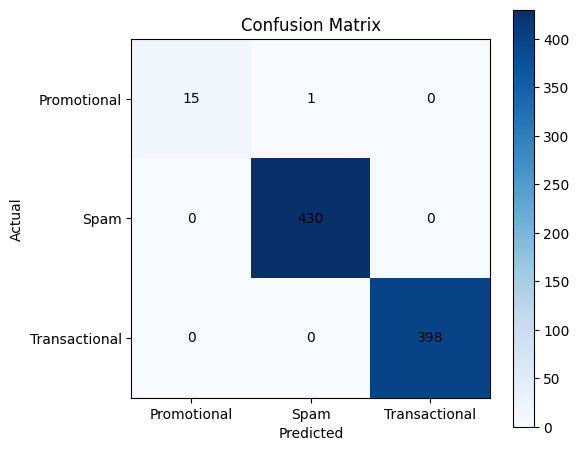

Promotional recall: 15/16 = 0.94


In [46]:
# Step 9: Confusion matrix (matplotlib)
classes = pipeline.classes_
cm = confusion_matrix(y_test, y_pred, labels=classes)

fig, ax = plt.subplots(figsize=(6,5))
im = ax.imshow(cm, interpolation='nearest', cmap='Blues')
ax.set_title("Confusion Matrix")
ax.set_xticks(np.arange(len(classes))); ax.set_xticklabels(classes, rotation=0)
ax.set_yticks(np.arange(len(classes))); ax.set_yticklabels(classes)
ax.set_xlabel('Predicted'); ax.set_ylabel('Actual')

# annotate counts
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="black")
fig.colorbar(im)
plt.tight_layout()
plt.show()

# Promotional recall if present
if 'Promotional' in y_test.unique():
    prom_total = (y_test == 'Promotional').sum()
    prom_correct = ((y_test == 'Promotional') & (y_pred == 'Promotional')).sum()
    if prom_total > 0:
        print(f"Promotional recall: {prom_correct}/{prom_total} = {prom_correct/prom_total:.2f}")


## Interpretation

Promotional:

* 12 correctly predicted as Promotional.
* 4 misclassified as Spam.
* None misclassified as Transactional.
* Promotional recall = 12 / (12+4) = 75%.

Spam:

* All 430 correctly predicted as Spam.
* Perfect classification (Recall = 100%).

Transactional:

* All 398 correctly predicted as Transactional.
* Perfect classification (Recall = 100%).

Summary:

* The model never confuses Spam with Transactional or vice versa → excellent. The only weakness: Promotional messages sometimes get misclassified as Spam (25% error rate). This is likely because promotional and spam messages often look similar (words like “free”, “offer”, “discount”).

In [42]:
# Step 10: Inference timing (end-to-end) and save
def avg_inference_time(pipeline, samples, n_runs=200):
    total = 0.0
    for _ in range(n_runs):
        t0 = time.perf_counter()
        pipeline.predict(samples)   # vectorize + predict
        total += (time.perf_counter() - t0)
    return total / n_runs

sample_msgs = X_test.sample(min(5, len(X_test)), random_state=RANDOM_STATE).tolist()
avg_time = avg_inference_time(pipeline, sample_msgs, n_runs=200)
per_msg_ms = (avg_time / len(sample_msgs)) * 1000
print(f"Avg time to predict {len(sample_msgs)} messages: {avg_time:.6f} sec -> per message: {per_msg_ms:.3f} ms")

# Save pipeline for API use
joblib.dump(pipeline, PIPELINE_OUT)
print("Saved pipeline to", PIPELINE_OUT)


Avg time to predict 5 messages: 0.001147 sec -> per message: 0.229 ms
Saved pipeline to sms_spam_pipeline_lr.joblib


In [43]:
# Step 11: Whitelist + FastAPI endpoint (save this as api.py)
from fastapi import FastAPI
from pydantic import BaseModel
import re, joblib

app = FastAPI(title="SMS Filter API")
PIPELINE_PATH = "sms_spam_pipeline_lr.joblib"  # or PIPELINE_OUT
pipeline = joblib.load(PIPELINE_PATH)

# Example whitelist; move to config file (yaml/json) in production
whitelisted_domains = ["trip.com", "icicibank.com", "hdfcbank.com"]
whitelisted_phrases = ["your otp is", "do not share this otp", "thank you for shopping with"]
whitelisted_senders = ["ICICIBANK", "HDFCBANK", "AMAZON"]

def check_whitelist(message, sender_id=None):
    msg = str(message).lower()
    # domains
    for d in whitelisted_domains:
        if d in msg:
            return True, f"domain:{d}"
    # phrases
    for p in whitelisted_phrases:
        if p in msg:
            return True, f"phrase:{p}"
    # sender: only allow if message contains transactional keywords
    if sender_id and sender_id.upper() in whitelisted_senders:
        if any(k in msg for k in ["otp", "credited", "debited", "transaction", "alert"]):
            return True, f"sender:{sender_id}"
    return False, None

class SMSRequest(BaseModel):
    message: str
    sender_id: str | None = None

@app.post("/check_sms")
def check_sms(req: SMSRequest):
    # whitelist check first
    is_white, reason = check_whitelist(req.message, sender_id=req.sender_id)
    if is_white:
        return {"verdict": "allowed", "reason": f"whitelisted:{reason}"}
    # else ML pipeline
    pred = pipeline.predict([req.message])[0]
    return {"verdict": pred, "reason": "ai"}

# To run locally:
# uvicorn api:app --host 0.0.0.0 --port 8000


## Whitelisting Mechanism

In [45]:
import re

# Example whitelist (you can load this from a YAML/JSON config file later)
whitelisted_domains = ["trip.com", "icicibank.com", "hdfcbank.com"]
whitelisted_phrases = ["your otp is", "thank you for shopping with", "do not share this otp"]
whitelisted_senders = ["ICICIBANK", "HDFCBANK", "AMAZON"]

def check_whitelist(message, sender_id=None):
    """
    Check if message matches whitelist rules.
    Returns (True, reason) if whitelisted, else (False, None).
    """
    msg = message.lower()

    # 1. Check domains
    for domain in whitelisted_domains:
        if domain in msg:
            return True, f"domain:{domain}"

    # 2. Check phrases
    for phrase in whitelisted_phrases:
        if phrase in msg:
            return True, f"phrase:{phrase}"

    # 3. Check sender IDs (optional)
    if sender_id and sender_id.upper() in whitelisted_senders:
        return True, f"sender:{sender_id}"

    return False, None

# Example usage
test_messages = [
    "Your OTP is 123456. Do not share with anyone. trip.com",
    "Get 50% OFF SALE today only!",
    "ICICIBANK: Your account has been credited with Rs 5000"
]

for msg in test_messages:
    is_white, reason = check_whitelist(msg, sender_id="ICICIBANK")
    if is_white:
        print(f"✅ Allowed (Whitelisted: {reason}) → {msg}")
    else:
        print(f"🚫 Pass to AI model → {msg}")


✅ Allowed (Whitelisted: domain:trip.com) → Your OTP is 123456. Do not share with anyone. trip.com
✅ Allowed (Whitelisted: sender:ICICIBANK) → Get 50% OFF SALE today only!
✅ Allowed (Whitelisted: sender:ICICIBANK) → ICICIBANK: Your account has been credited with Rs 5000


In [53]:
# 4. Save as .pkl (pickle file)
import joblib
joblib.dump((model, tfidf), "sms_spam_model.pkl")
print("✅ Model saved as sms_spam_model.pkl")

✅ Model saved as sms_spam_model.pkl
